## I am a strong, independent feature: A Naive Bayes Code Walkthrough
###### ~ by Vicente, F. 🐯 and Vista, S. 🦊

This notebook is meant to accompany the "**I am a strong, independent feature: A Comprehensive Guide to Naive Bayes**" module, which contains a detailed write-up on the intricacies of the Naive Bayes classifiers. Furthermore, it is highly recommended that you have a background in introductory machine learning concepts for an easier understanding.

Before we begin, some libraries would first be imported for later use.

#### Import Libraries
- `numpy` contains a large collection of mathematical functions
- `pandas` contains functions that are designed for data manipulation and data analysis

In [1]:
import numpy as np
import pandas as pd

- `matplotlib.pyplot` contains functions to create interactive plots

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

- `train_test_split` divides a dataset into two subsets

In [3]:
from sklearn.model_selection import train_test_split

- `accuracy_score` computes the accuracy score of a model
- `confusion_matrix` computes the confusion matrix of a model
- `ConfusionMatrixDisplay` visualizes a confusion matrix

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

- `GridSearchCV` is a cross-validation model used for comprehensive hyperparameter tuning

In [5]:
from sklearn.model_selection import GridSearchCV

As we have imported the necessary libraries, we will now train all three Naive Bayes classifiers and gauge their performance on the given datasets. 

The pipeline for training the models will include these steps: 
1. **Loading the dataset**, which would be chosen in consideration of each model's capabilities;
2. **Splitting the data into train and test datasets**, which is done so that a separate dataset can be used to validate the model;
3. **Training the model using the train set**, which would allow the model to learn the patterns in the data;
4. **Getting the train and test predictions from the model**, which can be used in gauging the performance of the model;
5. **Tuning the model's hyperparameters**, which can further improve the model's performance; and
6. **Getting the train and test predictions from the tuned model**, which can show if the model improved.

## Gaussian Naive Bayes
As previously mentioned in the module, Gaussian Naive Bayes deals with **continuous values**, which it assumes to be normally distributed, for its features. With this in mind, a dataset with continuous values for features will be used to demonstrate the performance of this classifier.

#### Loading the Dataset

In [6]:
from sklearn.datasets import load_iris

As seen below, this dataset contains 150 instances with the following features:
- sepal length (cm)	
- sepal width (cm)	
- petal length (cm)	
- petal width (cm)

Given these features, the task is to determine if the species of a flower is setosa, versicolor, or viriginica, which is represented as `0`, `1`, and `2` respectively.

In [7]:
data_iris = load_iris()
iris = pd.DataFrame(data_iris.data,columns=data_iris.feature_names)
iris['species'] = pd.Series(data_iris.target)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


The `X` or the features will now be separated from our target `y` which is the label. 

In [8]:
X_iris = iris.values[:,:-1]
y_iris = iris.values[:,-1].astype(int)

Lastly, the training set is separated from the test set.

In [9]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, stratify=y_iris, test_size=0.3, random_state=8)

#### Training the Model
We would be using sklearn's `GaussianNB` model, which would now be imported into the notebook.

In [10]:
from sklearn.naive_bayes import GaussianNB

First, we will initialize the GaussianNB model with default parameters.

In [11]:
gnb = GaussianNB()

This model is fitted with the `X_train_iris` and `y_train_iris` as follows:

In [12]:
%%time
gnb.fit(X_train_iris, y_train_iris)

Wall time: 998 µs


GaussianNB()

#### Checking the Performance
As the model is fitted with the training set, predictions can now be made. First, the train predictions are retrieved.

In [13]:
train_predictions_iris = gnb.predict(X_train_iris)

With these predictions, the training accuracy of the model can be computed.

In [14]:
print('Train Accuracy', accuracy_score(y_train_iris, train_predictions_iris))

Train Accuracy 0.9904761904761905


To visualize the train prediction results, a confusion matrix is generated.

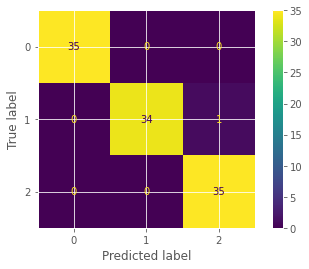

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_train_iris, train_predictions_iris), display_labels=gnb.classes_).plot()
plt.show()

Now, let us get the model's test predictions.

In [16]:
test_predictions_iris = gnb.predict(X_test_iris)

Then, we can check the test accuracy score of the model.

In [17]:
print('Test Accuracy', accuracy_score(y_test_iris, test_predictions_iris))

Test Accuracy 0.8666666666666667


And lastly, the test predictions are visualized with a confusion matrix.

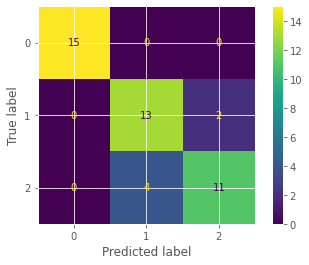

In [18]:
ConfusionMatrixDisplay(confusion_matrix(y_test_iris, test_predictions_iris), display_labels=gnb.classes_).plot()
plt.show()

##### Figure 1. Confusion Matrix of the Test data of the Gaussian Naive Bayes
From Figure 1, we can see that the model manages to correctly predict all of those that should be labeled as 0. However, some instances for the labels 1 and 2 were mislabeled, as 2 instances should be labeled as 1, but was instead labeled as 2, and 4 instances should be labeled as 2, but was labeled as 1.  

#### Tuning the Hyperparameters
To further improve this model, the hyperparameters can be tuned. For `GaussianNB`, only the `var_smoothing` hyperparameter can be tuned, which smooths the curve. A higher value would account for a higher number of samples that are further away from the distribution mean.

In [19]:
hyperparameters = [{
    'var_smoothing' : [1e-9, 1e-6, 1e-3, 1]
}]

A `GridSearchCV` will be used to test which value would the model perform the best on. This will automatically create a five-fold validation set on which to test the models on.

In [20]:
gnb_tuned = GridSearchCV(GaussianNB(), hyperparameters)

This cross-validation model will then be trained.

In [21]:
%%time
gnb_tuned.fit(X_train_iris, y_train_iris)
print('Best parameters:', gnb_tuned.best_params_)
print('Validation Accuracy', gnb_tuned.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Validation Accuracy 0.980952380952381
Wall time: 42.9 ms


With this, we can gauge the performance of the tuned model.

Train Accuracy 0.9904761904761905
Test Accuracy 0.8666666666666667


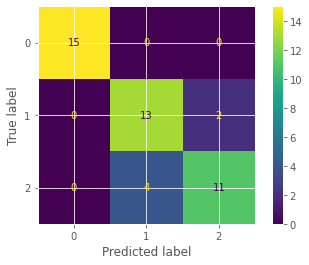

In [22]:
train_predictions_iris = gnb_tuned.predict(X_train_iris)
print('Train Accuracy', accuracy_score(y_train_iris, train_predictions_iris))
test_predictions_iris = gnb_tuned.predict(X_test_iris)
print('Test Accuracy', accuracy_score(y_test_iris, test_predictions_iris))
ConfusionMatrixDisplay(confusion_matrix(y_test_iris, test_predictions_iris), display_labels=gnb_tuned.classes_).plot()
plt.show()

##### Figure 2. Confusion Matrix of the Test data of the Tuned Gaussian Naive Bayes
As we can see in Figure 2, the resulting model resulted in the same confusion matrix because the default parameter values were chosen during the hyperparameter tuning.

## Multinomial Naive Bayes
While Gaussian Naive Bayes deal with continuous data, Multinomial Naive Bayes handles discrete data—this does not necessarily mean whole numbers, but this means numbers that represent occurrences and proportions. The digits dataset will be used to demonstrate the capabilities of Multinomial Naive Bayes.

#### Loading the Dataset

In [23]:
from sklearn.datasets import load_digits

As seen below, this dataset contains 1797 instances with each feature corresponding to a pixel for an 8x8 image (e.g., `pixel_0_0`). 

With these features, the task is to determine which number (i.e., from 0-9) is represented in an image.

In [24]:
data_digits = load_digits()
digits = pd.DataFrame(data_digits.data,columns=data_digits.feature_names)
digits['target'] = pd.Series(data_digits.target)
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Similar to earlier, the `X` will now be separated from our target `y`. 

In [25]:
X_digits = digits.values[:,:-1]
y_digits = digits.values[:,-1].astype(int)

Following this, the training set is separated from the test set.

In [26]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, stratify=y_digits, test_size=0.3, random_state=8)

#### Training the Model
To explore how we train a Multinomial Naive Bayes model, we will import sklearn's `MultinomialNB` class.

In [27]:
from sklearn.naive_bayes import MultinomialNB

As we now have imported the needed classes, we can now declare a `MultinomialNB` object with the default parameters: (1) **alpha = 1.0**, which means that the Additive smoothing is equal to 1 (i.e., we assume that all events are seen at least once), and (2) **fit_prior = True**, which means class prior probabilities are computed.

In [28]:
mnb = MultinomialNB()

This model is trained using the `X_train_digits` and `y_train_digits` data as follows:

In [29]:
%%time
mnb.fit(X_train_digits, y_train_digits)

Wall time: 15 ms


MultinomialNB()

#### Checking the Performance
The train predictions of this model will now be obtained.

In [30]:
train_predictions_digits = mnb.predict(X_train_digits)

Given these predictions, the model's training accuracy can be computed.

In [31]:
print('Train Accuracy', accuracy_score(y_train_digits, train_predictions_digits))

Train Accuracy 0.9132856006364359


A confusion matrix is also generated with the predictions for a visual representation.

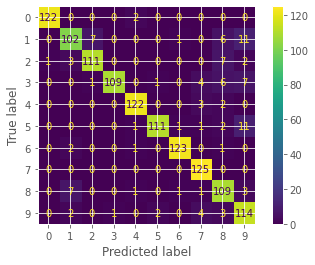

In [32]:
cm = confusion_matrix(y_train_digits, train_predictions_digits, labels=mnb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_).plot()
plt.show()

Now, the model will predict the labels of the test data.

In [33]:
test_predictions_digits = mnb.predict(X_test_digits)

Then, we can check the test accuracy score of the model.

In [34]:
print('Test Accuracy', accuracy_score(y_test_digits, test_predictions_digits))

Test Accuracy 0.8962962962962963


And lastly, the test predictions are visualized with a confusion matrix.

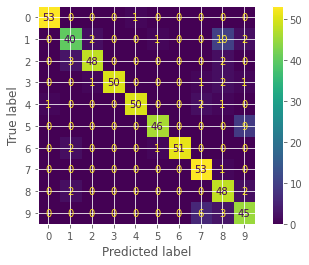

In [35]:
cm = confusion_matrix(y_test_digits, test_predictions_digits, labels=mnb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_).plot()
plt.show()

##### Figure 3. Confusion Matrix of the Test data of the Multinomial Naive Bayes
Using Figure 3, we can determine which classes our model have a hard time classifying. From this, we determined that our model is confused about classes 8 and 9, as these are the classes that it mostly predicts the instances to, even if the instances do not actually belong in this class.

#### Tuning the Hyperparameters
To further improve this model, the hyperparameters can be tuned. The aforementioned `alpha` and `fit_prior` parameters will be experimented on with a wide range of values in an effort to improve the model.

In [36]:
hyperparameters = [{
    'alpha' : [0.001, 0.01, 0.1, 1, 3, 5, 10, 15, 20, 50], 
    'fit_prior' : [False, True]
}]

A GridSearchCV will be used to test all combinations of `alpha` and `fit_prior` on the model.

In [37]:
mnb_tuned = GridSearchCV(MultinomialNB(), hyperparameters)

This cross-validation model will then be trained.

In [38]:
%%time
mnb_tuned.fit(X_train_digits, y_train_digits)
print('Best parameters:', mnb_tuned.best_params_)
print('Validation Accuracy', mnb_tuned.best_score_)

Best parameters: {'alpha': 20, 'fit_prior': False}
Validation Accuracy 0.9045184341997091
Wall time: 257 ms


With this, we can gauge the performance of the tuned model.

Train Accuracy 0.9108989657915673
Test Accuracy 0.8981481481481481


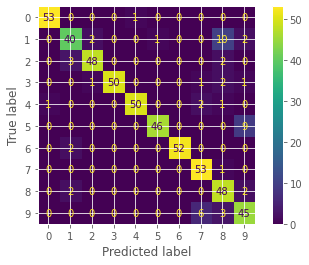

In [39]:
train_predictions_digits = mnb_tuned.predict(X_train_digits)
print('Train Accuracy', accuracy_score(y_train_digits, train_predictions_digits))
test_predictions_digits = mnb_tuned.predict(X_test_digits)
print('Test Accuracy', accuracy_score(y_test_digits, test_predictions_digits))
cm = confusion_matrix(y_test_digits, test_predictions_digits, labels=mnb_tuned.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb_tuned.classes_).plot()
plt.show()

##### Figure 4. Confusion Matrix of the Test data of the Tuned Multinomial Naive Bayes
From Figure 4, which holds the confusion matrix for the tuned model of the Multinomial Naive Bayes, we can see that it actually added 1 instance to the incorrectly predicted instances, compared to the train set. This means that tuning the model actually lessened its accuracy. 

**Note: As an experiment, you can set the `cv` parameter (i.e., the parameter value that indicates how many cross-validation splits) of the `GridSearchCV` to a higher value.** 
This is because having a `cv=5` for a small number of train data for 10 classes might not be enough to tune the hyperparameters correctly.

## Bernoulli Naive Bayes
Last, we would be creating a model that utilizes a Bernoulli Naive Bayes. In this, we would be generating a dataset, as what separates Bernoulli Naive Bayes from a Multinomial Naive Bayes is that Bernoulli Naive Bayes only accept binary values for input (i.e., values for its features).

#### Generating the Dataset
We will be generating a dataset with discrete features and binary classes. This will be done using sklearn's `make_classification` function.

In [40]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

As seen below, this generated dataset would contain 1000 instances with 20 features.

With this, the task is to determine if an instance is of class `0` or class `1`.

In [41]:
X_clf, y_clf = make_classification(n_samples=1000, random_state=8)
pd.DataFrame(np.c_[X_clf, y_clf])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.846505,-0.023321,1.129731,0.106389,-0.919395,1.335738,1.171215,-0.008739,-0.944069,-0.388608,...,-0.174402,-1.129708,-0.636207,-0.712915,0.159385,0.641064,-1.357693,-1.244719,0.835961,1.0
1,0.005108,0.633238,-2.891070,0.666766,1.029027,1.496175,0.115476,-0.187327,-0.521929,-0.600468,...,0.848875,0.829910,-0.286861,-0.087054,0.799790,-1.668096,1.855202,1.266643,-2.532618,0.0
2,-0.000302,-1.128944,0.446935,1.298482,1.387366,0.308517,-1.006711,0.111402,0.482312,1.025864,...,-0.273321,0.556527,-0.961626,-1.269991,-1.420246,0.370692,1.451687,-0.980561,0.813817,1.0
3,-0.208211,-0.784519,-0.777860,-0.614977,-1.062531,0.824113,-0.616968,-0.412415,-0.860892,-0.747823,...,-0.335001,0.632688,0.868737,-0.359242,1.191164,-1.197064,-0.809432,1.447597,-0.999285,0.0
4,1.443565,-0.608787,-0.702933,-0.526138,-0.066589,0.475833,-0.545094,0.211435,2.372755,-0.440273,...,1.169945,-0.149709,0.410386,0.584659,1.366567,-0.463751,-1.120485,-0.310986,-0.997527,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.716554,-1.908159,0.598988,0.924848,-0.840231,0.185634,-0.353211,0.014009,0.650882,-2.432511,...,0.451828,0.799506,0.724888,1.043760,0.824413,2.267649,-1.711920,-0.534103,0.202248,1.0
996,-0.841131,0.379229,0.632715,0.070642,0.311488,-1.275189,0.878991,-0.038427,0.162487,0.633021,...,-0.446529,0.038454,-0.512946,-0.739004,0.328143,-0.408540,-1.080675,-1.002737,0.390386,1.0
997,1.388038,1.192313,-0.995493,0.352019,-0.331097,-0.326835,1.525909,0.675665,-0.007302,0.481295,...,0.372844,-0.589714,0.617289,0.083496,0.397679,0.299775,0.474850,0.704581,-0.911893,0.0
998,-0.318155,1.584778,-0.683991,0.538593,0.952642,-0.537217,0.504928,-1.166782,2.160712,-0.527574,...,0.021149,0.824065,1.325293,0.917335,1.816532,-0.108255,-1.742979,0.167817,-1.129190,0.0


As `make_classification` produces continuous values, the values for `X` will be turned into discrete values. The final dataset is shown below:

In [58]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_clf = np.round_(scaler.fit_transform(X_clf)).astype(int)
pd.DataFrame(np.c_[X_clf, y_clf])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,1,1,0,0,1,1
1,0,1,0,1,1,1,1,0,0,0,...,1,1,0,0,1,0,1,1,0,0
2,0,0,1,1,1,1,0,1,1,1,...,0,1,0,0,0,1,1,0,1,1
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,1,0,0
4,1,0,0,0,1,1,0,1,1,0,...,1,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,1,0,1,0,1,1,0,...,1,1,1,1,1,1,0,0,1,1
996,0,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,1
997,1,1,0,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,0,0
998,0,1,0,1,1,0,1,0,1,0,...,1,1,1,1,1,1,0,1,0,0


Lastly, the training set is separated from the test set.

In [43]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, stratify=y_clf, test_size=0.3, random_state=8)

#### Training the Model
To see the Bernoulli model in action, we will import sklearn's `BernoulliNB` class.

In [44]:
from sklearn.naive_bayes import BernoulliNB

First, we will initialize the `BernoulliNB` model with default parameters.

In [45]:
bnb = BernoulliNB()

This model will be trained on the `X_train_clf` and `y_train_clf` data as follows:

In [46]:
%%time
bnb.fit(X_train_clf, y_train_clf)

Wall time: 5.98 ms


BernoulliNB()

#### Checking the Performance
The train predictions of this model will now be obtained.

In [47]:
train_predictions_clf = bnb.predict(X_train_clf)

Given these predictions, the model's training accuracy can be computed.

In [48]:
print('Train Accuracy', accuracy_score(y_train_clf, train_predictions_clf))

Train Accuracy 0.8728571428571429


A confusion matrix is also generated with the predictions for a visual representation.

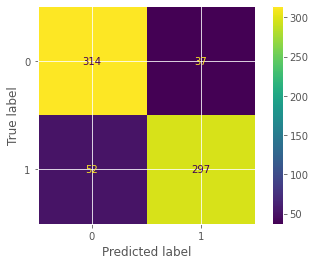

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y_train_clf, train_predictions_clf), display_labels=bnb.classes_).plot()
plt.show()

Now, the model will predict the labels of the test data.

In [50]:
test_predictions_clf = bnb.predict(X_test_clf)

Then, we can check the test accuracy score of the model.

In [51]:
print('Test Accuracy', accuracy_score(y_test_clf, test_predictions_clf))

Test Accuracy 0.9133333333333333


And lastly, the test predictions are visualized with a confusion matrix.

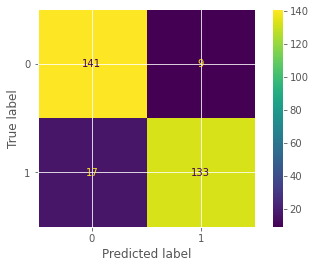

In [52]:
ConfusionMatrixDisplay(confusion_matrix(y_test_clf, test_predictions_clf), display_labels=bnb.classes_).plot()
plt.show()

##### Figure 5. Confusion Matrix of the Test data of the Bernoulli Naive Bayes
Using 300 instances for our test data, we can see from Figure 5 that the Bernoulli Naive Bayes model was able to accurately predict 149 instances of `Class 0` and 148 instances for `Class 1`.

#### Tuning the Hyperparameters
To further improve this model, the hyperparameters can be tuned. This model will use the same hyperparameters as the `MultinomialNB` model, which tuned the `alpha` and `fit_prior` parameters.

In [53]:
hyperparameters = [{
    'alpha' : [0.001, 0.01, 0.1, 1, 3, 5, 10, 15, 20, 50], 
    'fit_prior' : [False, True]
}]

A GridSearchCV will be used to test all combinations of `alpha` and `fit_prior` on the model.

In [54]:
bnb_tuned = GridSearchCV(BernoulliNB(), hyperparameters)

This cross-validation model will then be trained.

In [55]:
%%time
bnb_tuned.fit(X_train_clf, y_train_clf)
print('Best parameters:', bnb_tuned.best_params_)
print('Validation Accuracy', bnb_tuned.best_score_)

Best parameters: {'alpha': 0.001, 'fit_prior': False}
Validation Accuracy 0.872857142857143
Wall time: 243 ms


With this, we can gauge the performance of the tuned model.

Train Accuracy 0.8728571428571429
Test Accuracy 0.9133333333333333


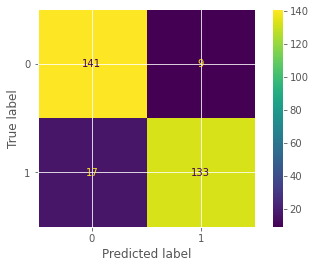

In [56]:
train_predictions_clf = bnb_tuned.predict(X_train_clf)
print('Train Accuracy', accuracy_score(y_train_clf, train_predictions_clf))
test_predictions_clf = bnb_tuned.predict(X_test_clf)
print('Test Accuracy', accuracy_score(y_test_clf, test_predictions_clf))
ConfusionMatrixDisplay(confusion_matrix(y_test_clf, test_predictions_clf), display_labels=bnb_tuned.classes_).plot()
plt.show()

##### Figure 6. Confusion Matrix of the Test data of the Tuned Bernoulli Naive Bayes
Comparing Figure 5 and Figure 6, we can see that they are the same confusion matrix. This means that tuning the model resulted in the same values for the parameters, thus, resulting in the same model.

## Conclusion
With this, the performance of all three Naive Bayes classifiers has proven to be rather impressive, considering their simplistic algorithm. While these models naturally have their restrictions and disadvantages, the significantly reduced training time and effectiveness in their respective niches should not be discounted when choosing a viable model.